*Lotka - Voletrra verif margintudes EA*

In [14]:
#@title Método de Euler - Lotka-Volterra - PVI
t = t0 + h*np.arange(N+1)
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = x0
y[0] = y0

for n in range(N): #Implementa y guarda los valores en x_n+1 y y_n+1
  dx,dy = f_sistema(x[n],y[n])
  x[n+1] = x[n] + h*dx
  y[n+1] = y[n] + h*dy

In [15]:
#@title Euler vs RK4
def rk4_sistema(f_sistema,t0,tf,x0,y0,h):
  N = int(np.ceil((tf-t0)/h))
  t = t0 + h*np.arange(N+1)
  x = np.zeros(N+1)
  y = np.zeros(N+1)
  x[0] = x0
  y[0] = y0

  for n in range(N):
    k1x, k1y = f_sistema(x[n],y[n])
    k2x, k2y = f_sistema(x[n] + h*k1x/2, y[n] + h*k1y/2)
    k3x, k3y = f_sistema(x[n] + h*k2x/2, y[n] + h*k2y/2)
    k4x, k4y = f_sistema(x[n] + h*k3x, y[n] + h*k3y)

    #Acumula la solución RK4:
    x[n+1] = x[n] +  h * (k1x + 2*k2x + 2*k3x + k4x)/6
    y[n+1] = y[n] + h * (k1y + 2*k2y + 2*k3y + k4y)/6

  return t,x,y

t_euler,x_euler, y_euler = t,x,y #Euler ya calculado
t_rk4, x_rk4, y_rk4 = rk4_sistema(f_sistema,t0,tf,x0,y0,h)

In [16]:
#@title imprime resultados Euler vs Rk4 problema Lotka-Volterra del PVI
#Código reciclado de los anteriores puntos ()
print("=" * 70)
print("RESULTADOS NUMÉRICOS - MÉTODO DE EULER")
print("=" * 70)
print("t\t\tx(t)\t\ty(t)")
print("-" * 60)
for i in range(0, len(t_euler), 20000):  # Mostrar cada 20000 puntos
    print(f"{t_euler[i]:.1f}\t\t{x_euler[i]:.6f}\t\t{y_euler[i]:.6f}")

print("\n" + "=" * 70)
print("RESULTADOS NUMÉRICOS - MÉTODO RK4")
print("=" * 70)
print("t\t\tx(t)\t\ty(t)")
print("-" * 60)
for i in range(0, len(t_rk4), 20000):  # Mostrar cada 20000 puntos
    print(f"{t_rk4[i]:.1f}\t\t{x_rk4[i]:.6f}\t\t{y_rk4[i]:.6f}")

print("\n" + "=" * 70)
print("COMPARACIÓN Y ERRORES ENTRE MÉTODOS")
print("=" * 70)
print("t\t\tError x(t)\tError y(t)")
print("-" * 60)
for i in range(0, len(t_euler), 20000):
    error_x = abs(x_euler[i] - x_rk4[i])
    error_y = abs(y_euler[i] - y_rk4[i])
    print(f"{t_euler[i]:.1f}\t\t{error_x:.8f}\t{error_y:.8f}")

RESULTADOS NUMÉRICOS - MÉTODO DE EULER
t		x(t)		y(t)
------------------------------------------------------------
0.0		80.000000		30.000000
200.0		93.826282		13.012866

RESULTADOS NUMÉRICOS - MÉTODO RK4
t		x(t)		y(t)
------------------------------------------------------------
0.0		80.000000		30.000000
200.0		89.501224		15.989119

COMPARACIÓN Y ERRORES ENTRE MÉTODOS
t		Error x(t)	Error y(t)
------------------------------------------------------------
0.0		0.00000000	0.00000000
200.0		4.32505803	2.97625367


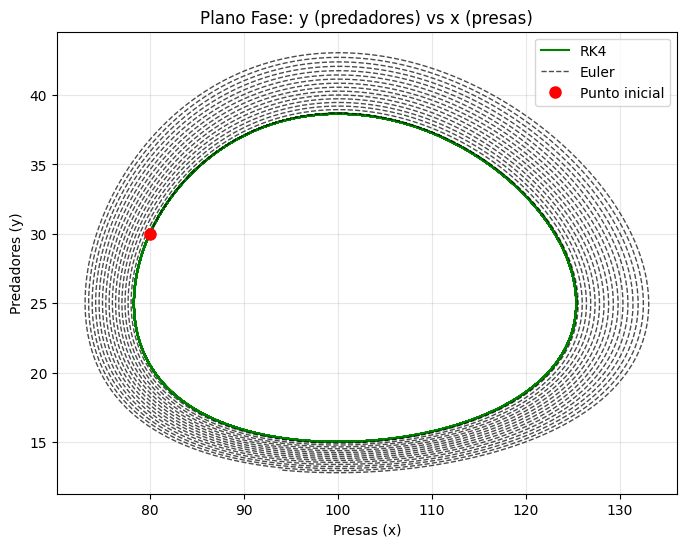

In [17]:
#@title Gráficos

plt.figure(figsize=(8, 6))
plt.plot(x_rk4, y_rk4, 'g-', label="RK4", linewidth=1.5)
plt.plot(x_euler, y_euler, 'k--', alpha=0.7, label="Euler", linewidth=1)
plt.plot(x0, y0, 'ro', markersize=8, label="Punto inicial")
plt.title("Plano Fase: y (predadores) vs x (presas)")
plt.xlabel("Presas (x)")
plt.ylabel("Predadores (y)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()